In [5]:
# Load basic libraries
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# read in ARFF file
arff_file = arff.loadarff('Training_Dataset.arff')
df = pd.DataFrame(arff_file[0])

# Change from byte strings to ints, cause it is an aarf file
for col in df.select_dtypes([np.object_, 'object']).columns:
    df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Grab necessary features from data
features_to_consider = ["having_IP_Address", "URL_Length", "having_At_Symbol", "double_slash_redirecting", "Prefix_Suffix", "having_Sub_Domain", "URL_of_Anchor", "HTTPS_token", "SFH", "Links_in_tags", "Submitting_to_email"]
X = df[features_to_consider].values
y = df["Result"].values



In [6]:
# Start of Using a Logistic classifier instead
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
 
coefficients = model.coef_[0] 

# Print out coefficients, so we can use it in the sigmoid function in the chrome extension 
for i, coef in enumerate(coefficients):
    feature_name = features_to_consider[i]
    
    print("Feature", feature_name, np.round(coef, decimals = 2))


print("Accuracy", accuracy)
print("Intercept", model.intercept_)

# Intercept [4.50696702]
# accuracy is around 0.88


Feature having_IP_Address 0.33
Feature URL_Length 0.02
Feature having_At_Symbol 0.25
Feature double_slash_redirecting -0.02
Feature Prefix_Suffix 3.32
Feature having_Sub_Domain 0.71
Feature URL_of_Anchor 3.79
Feature HTTPS_token -0.34
Feature SFH 0.81
Feature Links_in_tags 0.89
Feature Submitting_to_email -0.2
Accuracy 0.864314789687924
Intercept [4.59538484]


<function matplotlib.pyplot.show(close=None, block=None)>

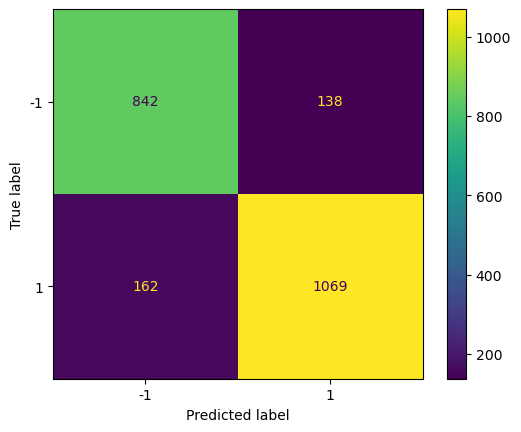

In [ ]:
# confusion matrix check
from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
display =  metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [-1, 1])
display.plot()
plt.show
# Confusion matrix shoes That the model does pretty well for not Falsely classifying, We shouldnt have to worry
# too much about false positive or false negatives